# Heart Failure Prediction Dataset 


Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Attribute Information
Age: age of the patient [years]
Sex: sex of the patient [M: Male, F: Female]
ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP: resting blood pressure [mm Hg]
Cholesterol: serum cholesterol [mm/dl]
FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
Oldpeak: oldpeak = ST [Numeric value measured in depression]
ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease: output class [1: heart disease, 0: Normal]
Source
This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations
Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

Acknowledgements
Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [223]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


Import Libraries 

In [222]:
%matplotlib inline

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Read Data

In [225]:
hf_pred=pd.read_csv("E:/DATASETS/heart-failure-prediction/heart.csv")
hf_pred

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [226]:
hf_pred.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [227]:
hf_pred.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [228]:
hf_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [229]:
hf_pred.shape

(918, 12)

The dataset contains 918 rows and 12 columns 

In [230]:
hf_pred.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [231]:
hf_pred.isnull().value_counts()

Age    Sex    ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
False  False  False          False      False        False      False       False  False           False    False     False           918
Name: count, dtype: int64

The dataset contains no missing values 


In [232]:
# Summary statistics of the object type columns or variables 
hf_pred.describe(include="O")

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


The dataset includes 4 object data type columns including
* Sex
* chest pain type 
* resting ecg 
* exercise angina 
* ST slope 

#### Data types 


In [233]:
hf_pred.dtypes.value_counts()

int64      6
object     5
float64    1
Name: count, dtype: int64

In [234]:
hf_pred.duplicated().sum()

np.int64(0)

There are no duplicated data types in the dataset

In [235]:
hf_pred.index


RangeIndex(start=0, stop=918, step=1)

## Exploratory Data Analysis 


## First we explore the object data types 

In [236]:
sns.countplot(hf_pred, x= 'Sex', hue = 'Sex')
plt.title( ' Count Plot of Sex distribution')


Text(0.5, 1.0, ' Count Plot of Sex distribution')

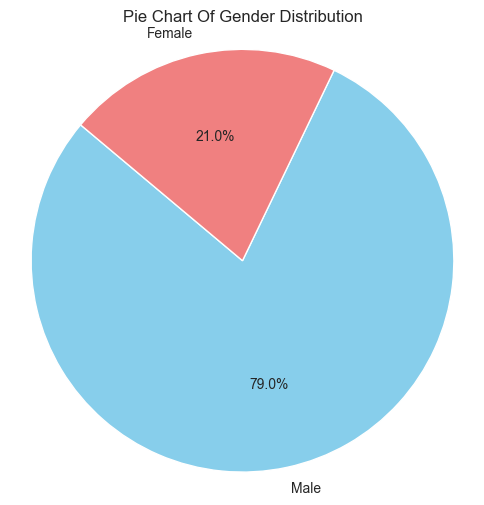

In [265]:
# Count gender distribution
gender_counts = hf_pred['Sex'].value_counts()
gender_labels = ['Male', 'Female']
gender_sizes = [gender_counts[1], gender_counts[0]]

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_sizes, labels=gender_labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Pie Chart Of Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Now to create Histograms that identify the distribution of the variables 


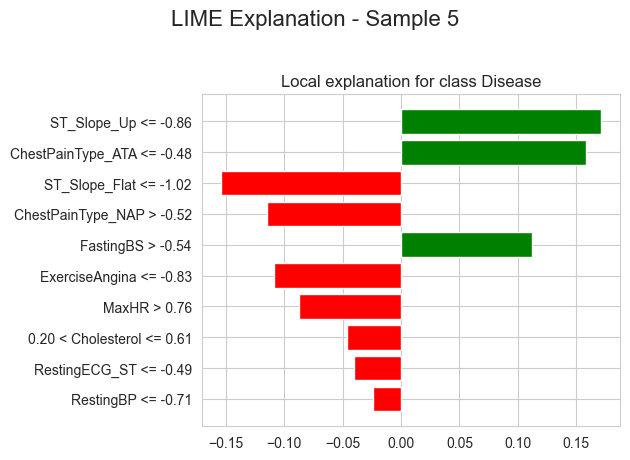

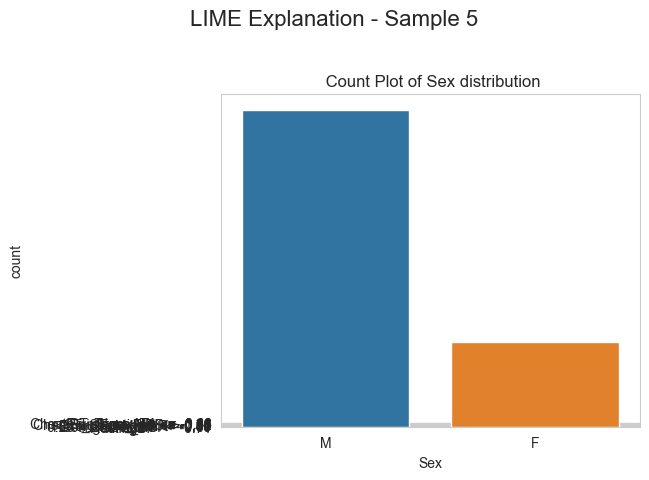

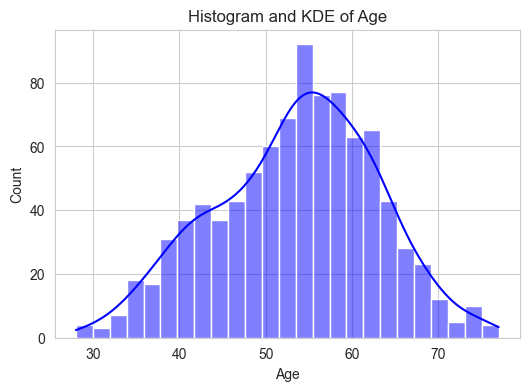

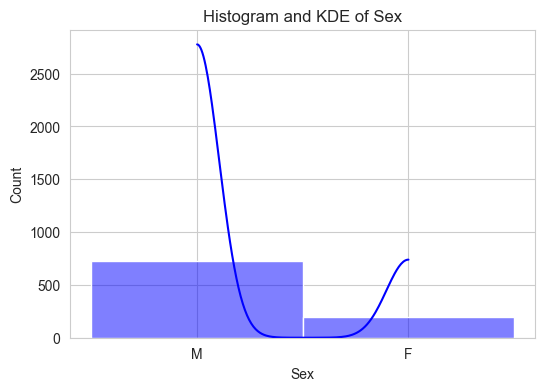

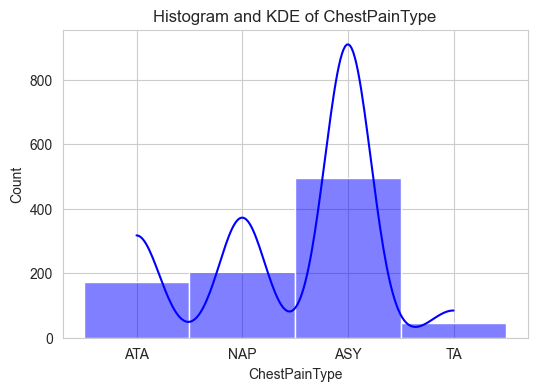

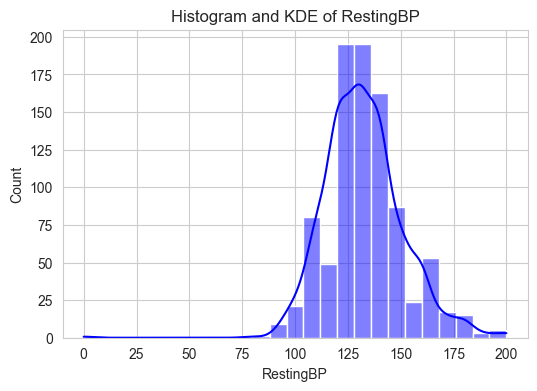

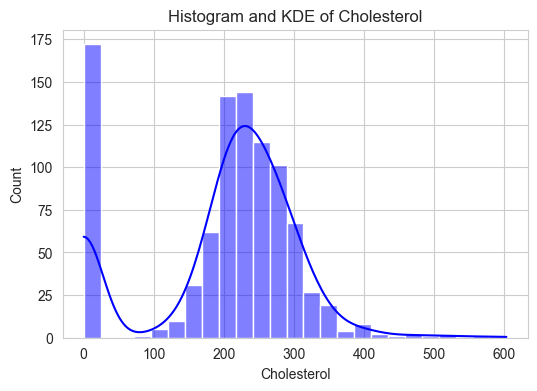

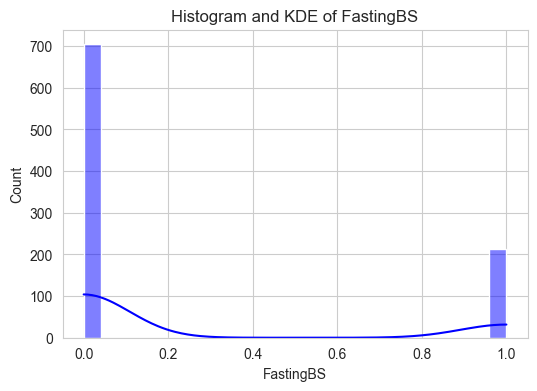

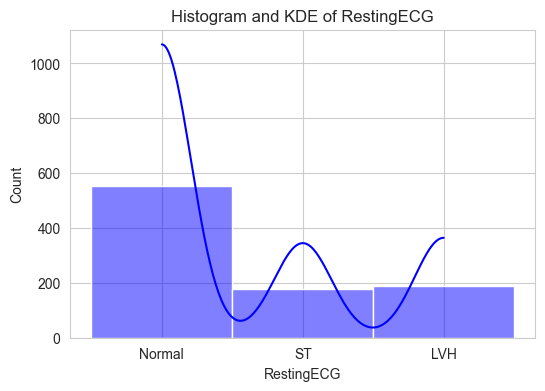

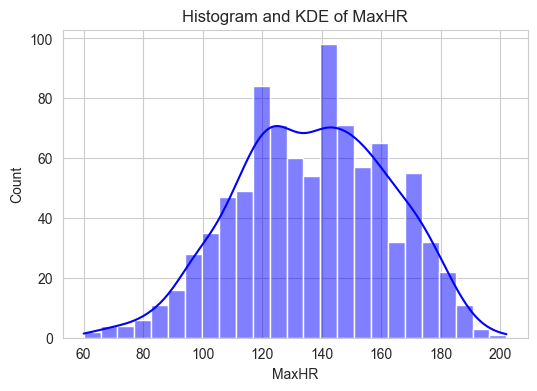

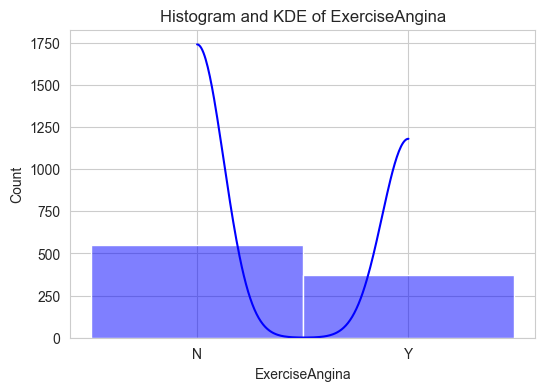

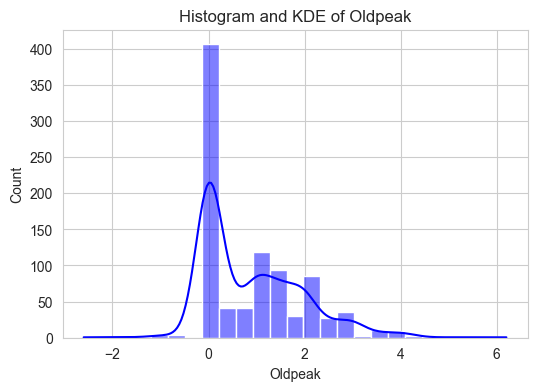

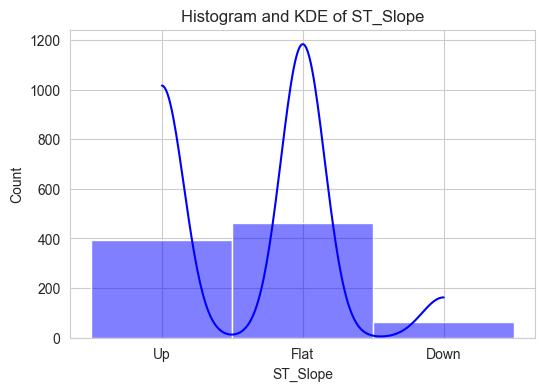

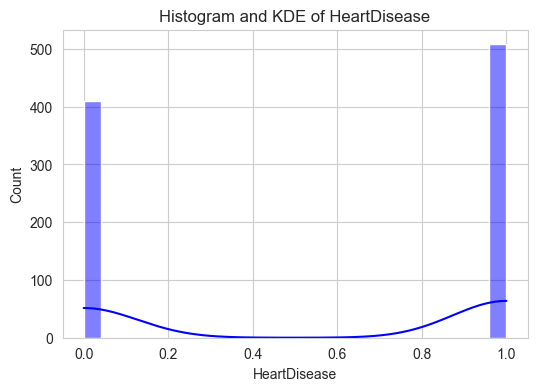

In [238]:
for col in hf_pred.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(hf_pred[col],kde=True,bins=25,color='blue')
    plt.xlabel(col)
    plt.title(f'Histogram and KDE of {col}')
    plt.show()

# Now we can loop through the numeric datatypes to analyse the distributions 

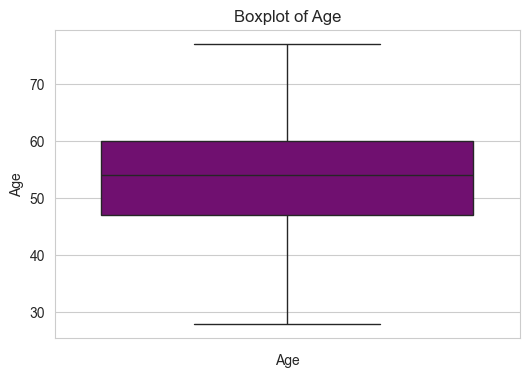

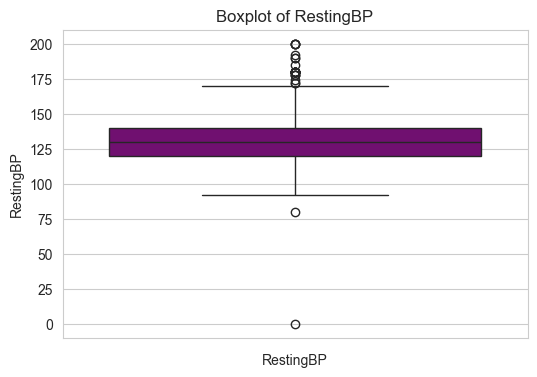

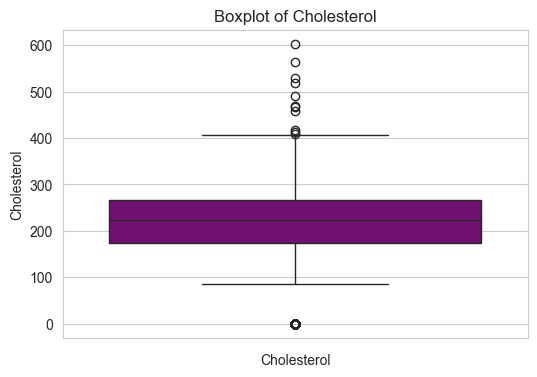

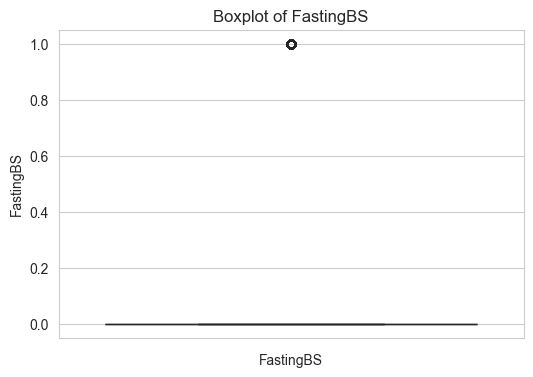

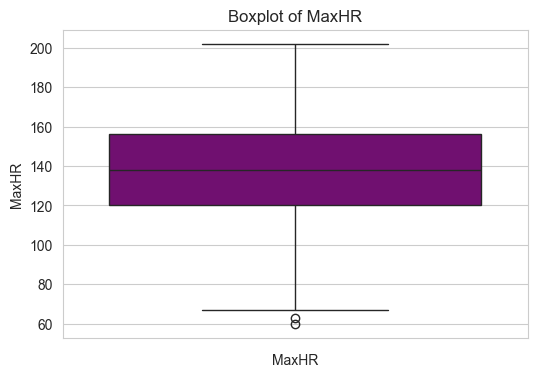

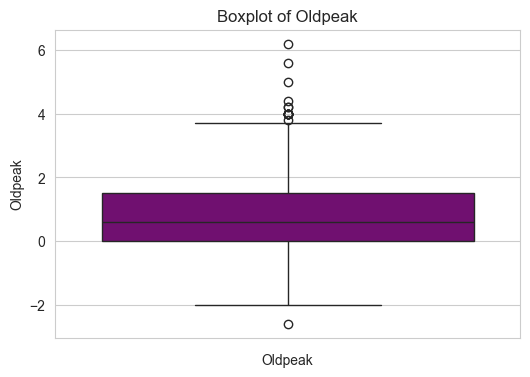

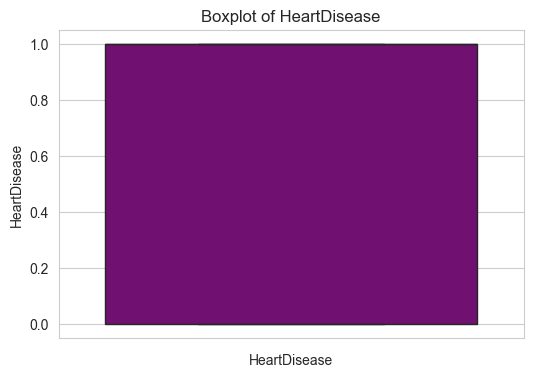

In [239]:
for col in hf_pred.columns:
    if pd.api.types.is_numeric_dtype(hf_pred[col]) and not pd.api.types.is_bool_dtype(hf_pred[col]):
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=hf_pred[col].dropna(), color='purple') 
        plt.xlabel(col)
        plt.title(f'Boxplot of {col}')
        plt.show()

## Correlation of numeric data types 


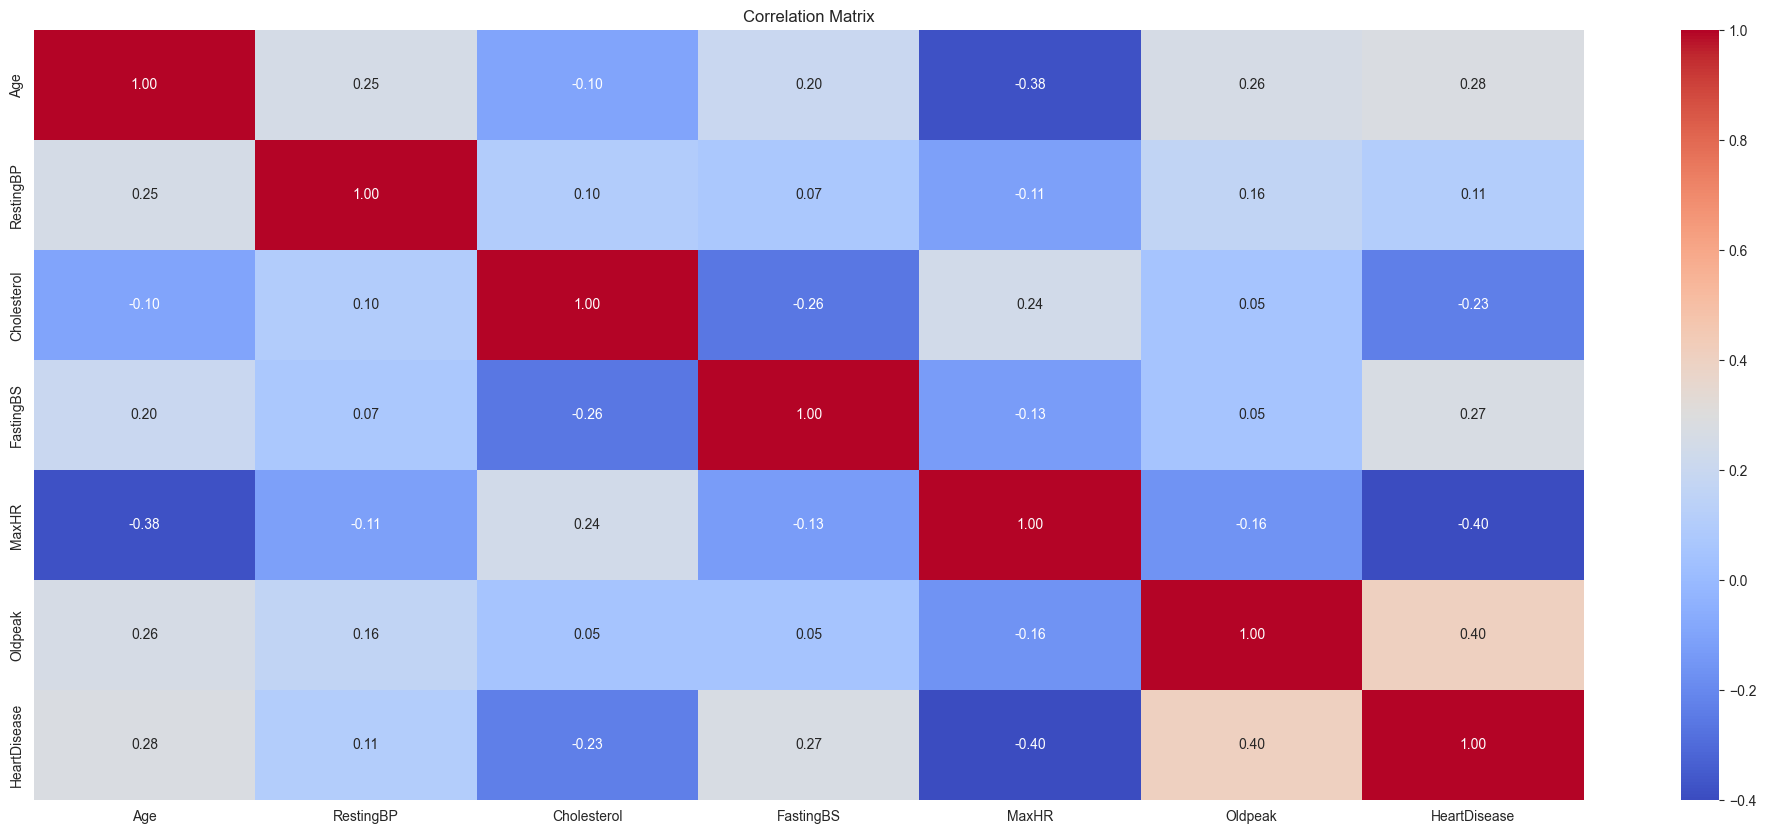

In [240]:
plt.figure(figsize=(25,10))
corr_matrix=hf_pred.corr(numeric_only=True)
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

The correlation matrix reveals 
* There is a positive correlation between Old peak and Heart disease (0.40)
* There is also a negative correlation between max Heart rate and Heart disease (-0.40)

## Exploratory Data Analysis (EDA) Summary
#####  Summary Statistics:

Numerical variables like Age, RestingBP, Cholesterol, MaxHR, and Oldpeak show variation among patients.

Categorical variables include Sex, ChestPainType, RestingECG, ExerciseAngina, and ST_Slope.

##### Target Variable (HeartDisease):

The dataset is relatively balanced in terms of presence (1) vs absence (0) of heart disease, which is suitable for classification tasks.

##### Correlation Heatmap:

Oldpeak and ExerciseAngina appear to correlate positively with HeartDisease.

MaxHR shows a negative correlation with HeartDisease.

##### Missing Values:

There are no missing values in this dataset.



# Data Preprocessing 

Next, we'll perform data preprocessing, which includes encoding categorical variables, scaling features, and splitting the data

### Label Encoding 

In [241]:
le = LabelEncoder()
hf_pred['Sex']=le.fit_transform(hf_pred['Sex'])
hf_pred['ExerciseAngina']=le.fit_transform(hf_pred['ExerciseAngina'])
hf_pred=pd.get_dummies(hf_pred, columns=['ChestPainType','ST_Slope','RestingECG'], drop_first=True)
bool_cols = hf_pred.select_dtypes(include='bool').columns
hf_pred[bool_cols] = hf_pred[bool_cols].astype(int)

In [242]:
hf_pred

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,0,1,0,0,0,1,1,0
1,49,0,160,180,0,156,0,1.0,1,0,1,0,1,0,1,0
2,37,1,130,283,0,98,0,0.0,0,1,0,0,0,1,0,1
3,48,0,138,214,0,108,1,1.5,1,0,0,0,1,0,1,0
4,54,1,150,195,0,122,0,0.0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,0,0,1,1,0,1,0
914,68,1,144,193,1,141,0,3.4,1,0,0,0,1,0,1,0
915,57,1,130,131,0,115,1,1.2,1,0,0,0,1,0,1,0
916,57,0,130,236,0,174,0,0.0,1,1,0,0,1,0,0,0


In [243]:
hf_pred.shape

(918, 16)

After encoding the number of columns have increased to 16 

In [244]:
hf_pred.dtypes

Age                    int64
Sex                    int64
RestingBP              int64
Cholesterol            int64
FastingBS              int64
MaxHR                  int64
ExerciseAngina         int64
Oldpeak              float64
HeartDisease           int64
ChestPainType_ATA      int64
ChestPainType_NAP      int64
ChestPainType_TA       int64
ST_Slope_Flat          int64
ST_Slope_Up            int64
RestingECG_Normal      int64
RestingECG_ST          int64
dtype: object

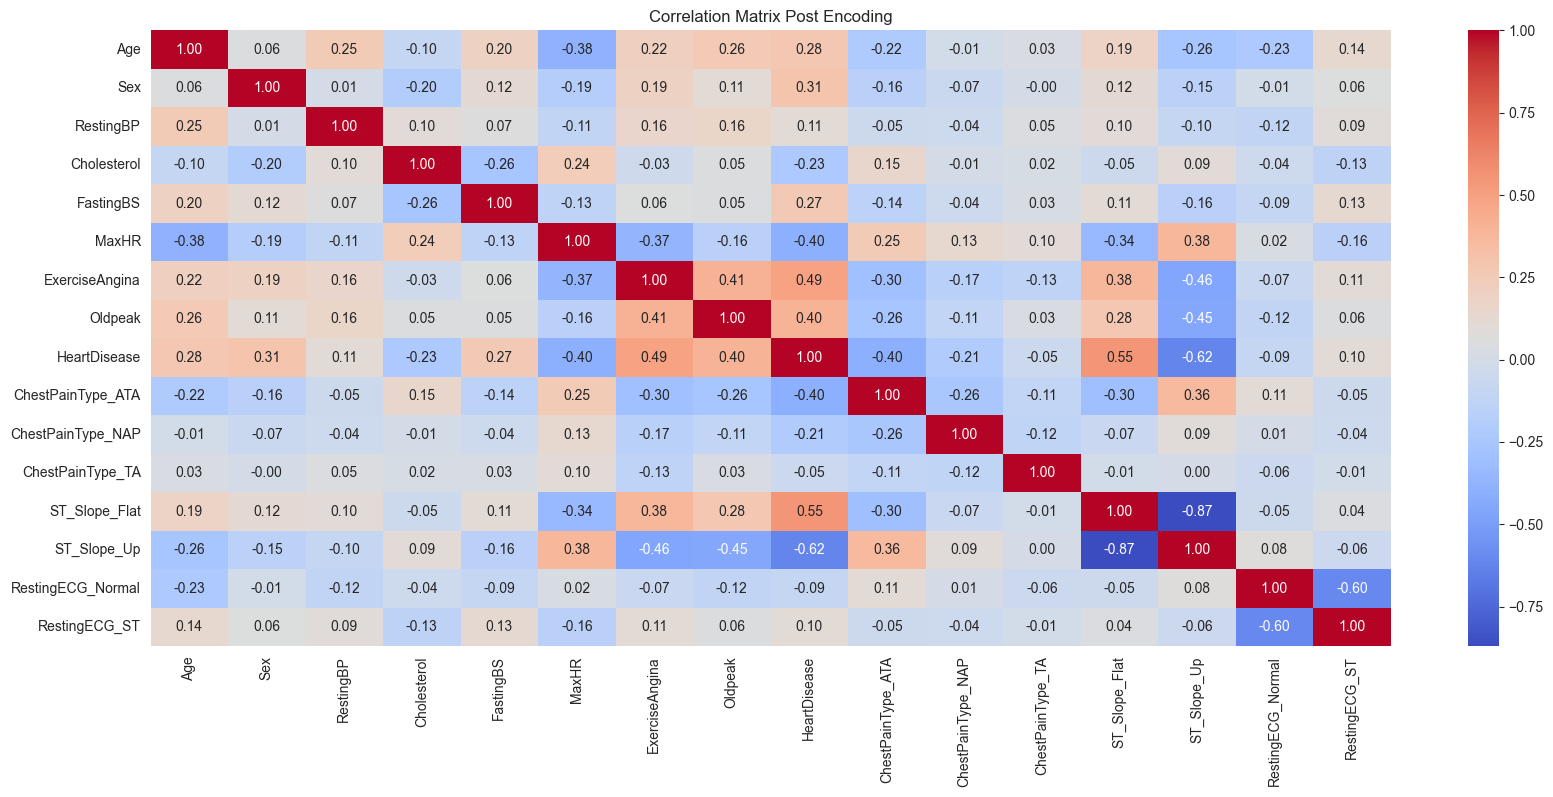

In [245]:
plt.figure(figsize=(20, 8))
corr_matrix = hf_pred.corr()
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Post Encoding")
plt.show()

In [246]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [247]:

# Separate features and target
X = hf_pred.drop('HeartDisease', axis=1)
y = hf_pred['HeartDisease']

from sklearn.model_selection import train_test_split

# 80/20 split with stratification to preserve class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


🧹 Data Preprocessing Summary
Categorical Variables: Encoded using One-Hot Encoding (with drop='first' to avoid multicollinearity).

Numerical Variables: Scaled using StandardScaler.

Train-Test Split: 80% training (734 samples), 20% testing (184 samples), stratified by the target to maintain balance.

Result: 15 features created after encoding and scaling.



#### Scaling the dataset 

In [248]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## Model Selection 

In [249]:
# Import libraries due to code state reset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import shap


###  Logistic Regression 

In [250]:
# Logistic Regression
# Train and evaluate Logistic Regression
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_test_scaled)
log_proba = log_model.predict_proba(X_test_scaled)[:, 1]
log_report = classification_report(y_test, log_preds, output_dict=False)
log_auc = roc_auc_score(y_test, log_proba)

In [251]:
from sklearn.metrics import classification_report
import pandas as pd

# Logistic Regression
log_report = classification_report(y_test, log_preds, output_dict=True)
log_report_df = pd.DataFrame(log_report).round(2)
print("Logistic Regression Classification Report")
display(log_report_df)


Logistic Regression Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.91,0.87,0.89,0.89,0.89
recall,0.83,0.93,0.89,0.88,0.89
f1-score,0.87,0.90,0.89,0.88,0.89
support,82.00,102.00,0.89,184.00,184.00


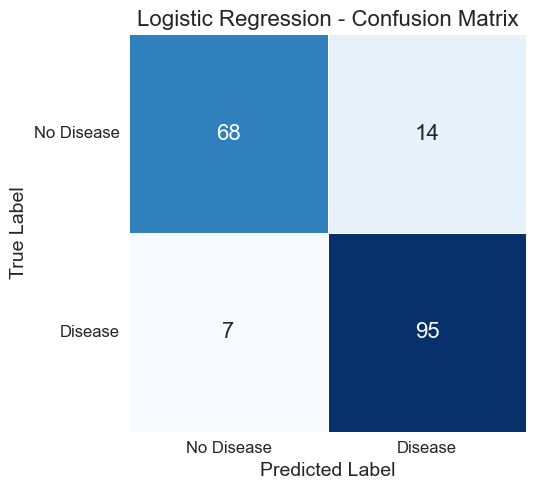

In [252]:
# Logistic Regression Confusion Matrix
cm_log= confusion_matrix(y_test, log_preds)

# Plot using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            annot_kws={"size": 16},  # Larger text
            cbar=False,              # No color bar
            linewidths=0.5, linecolor='white', square=True)

plt.title("Logistic Regression - Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["No Disease", "Disease"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["No Disease", "Disease"], fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

### Support Vector Machine (SVM) 

In [253]:
# Train and evaluate SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_preds = svm_model.predict(X_test_scaled)
svm_proba = svm_model.predict_proba(X_test_scaled)[:, 1]
svm_report = classification_report(y_test, svm_preds, output_dict=False)
svm_auc = roc_auc_score(y_test, svm_proba)


In [254]:
# SVM
svm_report = classification_report(y_test, svm_preds, output_dict=True)
svm_report_df = pd.DataFrame(svm_report).round(2)
print("SVM Classification Report")
display(svm_report_df)


SVM Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.93,0.88,0.9,0.91,0.9
recall,0.84,0.95,0.9,0.90,0.9
f1-score,0.88,0.92,0.9,0.90,0.9
support,82.00,102.00,0.9,184.00,184.0


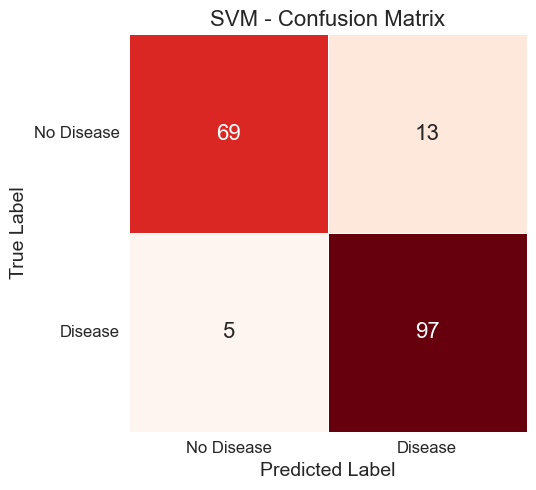

In [255]:
# SVM Confusion Matrix
cm_svm = confusion_matrix(y_test, svm_preds)

# Plot using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Reds',
            annot_kws={"size": 16},  # Larger text
            cbar=False,              # No color bar
            linewidths=0.5, linecolor='white', square=True)

plt.title("SVM - Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["No Disease", "Disease"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["No Disease", "Disease"], fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

### Random Forest Classfier 

In [256]:
# Train and evaluate Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)
rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]
rf_report = classification_report(y_test, rf_preds, output_dict=False)
rf_auc = roc_auc_score(y_test, rf_proba)

In [257]:
# Random Forest
rf_report = classification_report(y_test, rf_preds, output_dict=True)
rf_report_df = pd.DataFrame(rf_report).round(2)
print("Random Forest Classification Report")
display(rf_report_df)


Random Forest Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.89,0.90,0.9,0.90,0.9
recall,0.88,0.91,0.9,0.89,0.9
f1-score,0.88,0.91,0.9,0.90,0.9
support,82.00,102.00,0.9,184.00,184.0


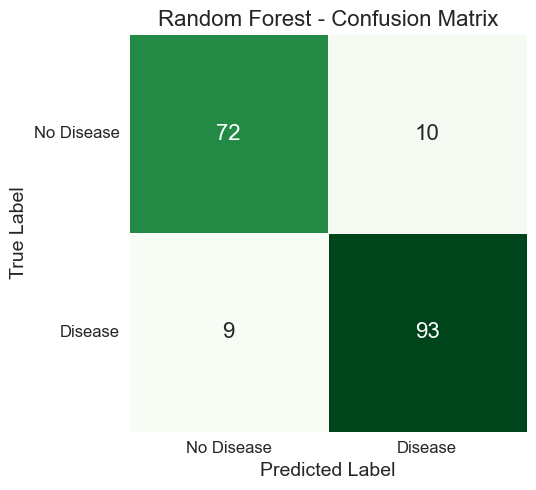

In [258]:
# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, rf_preds)

# Plot using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            annot_kws={"size": 16},  # Larger text
            cbar=False,              # No color bar
            linewidths=0.5, linecolor='white', square=True)

plt.title("Random Forest - Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["No Disease", "Disease"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["No Disease", "Disease"], fontsize=12, rotation=0)
plt.tight_layout()
plt.show()




### XG Boost 

In [259]:
# Train and evaluate XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)
xgb_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]
xgb_report = classification_report(y_test, xgb_preds, output_dict=False)
xgb_auc = roc_auc_score(y_test, xgb_proba)

C:\Users\thaba\miniconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:08:35] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [260]:
# XGBoost
xgb_report = classification_report(y_test, xgb_preds, output_dict=True)
xgb_report_df = pd.DataFrame(xgb_report).round(2)
print("XGBoost Classification Report")
display(xgb_report_df)


XGBoost Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.84,0.87,0.86,0.86,0.86
recall,0.84,0.87,0.86,0.86,0.86
f1-score,0.84,0.87,0.86,0.86,0.86
support,82.00,102.00,0.86,184.00,184.00


## XG Boost Confusion Matrix 

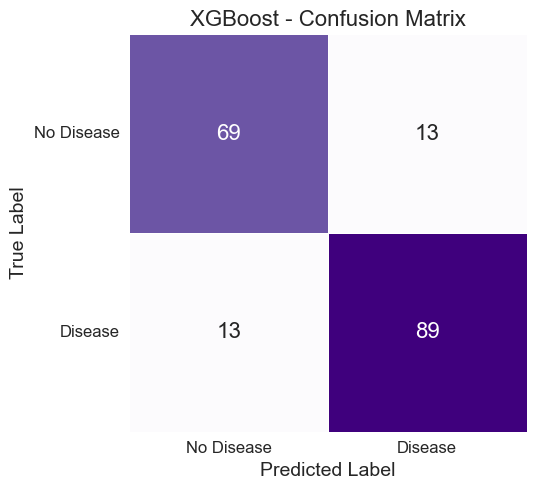

In [261]:
# XGBoost Confusion Matrix

cm_xgb = confusion_matrix(y_test, xgb_preds)

# Plot using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Purples',
            annot_kws={"size": 16},  # Larger text
            cbar=False,              # No color bar
            linewidths=0.5, linecolor='white', square=True)

plt.title("XGBoost - Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(ticks=[0.5, 1.5], labels=["No Disease", "Disease"], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=["No Disease", "Disease"], fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

In [262]:

(log_report, log_auc), (svm_report, svm_auc), (rf_report, rf_auc), (xgb_report, xgb_auc)

(({'0': {'precision': 0.9066666666666666,
    'recall': 0.8292682926829268,
    'f1-score': 0.8662420382165605,
    'support': 82.0},
   '1': {'precision': 0.8715596330275229,
    'recall': 0.9313725490196079,
    'f1-score': 0.9004739336492891,
    'support': 102.0},
   'accuracy': 0.8858695652173914,
   'macro avg': {'precision': 0.8891131498470948,
    'recall': 0.8803204208512674,
    'f1-score': 0.8833579859329248,
    'support': 184.0},
   'weighted avg': {'precision': 0.8872051588884458,
    'recall': 0.8858695652173914,
    'f1-score': 0.8852184150325296,
    'support': 184.0}},
  np.float64(0.9296987087517934)),
 ({'0': {'precision': 0.9324324324324325,
    'recall': 0.8414634146341463,
    'f1-score': 0.8846153846153846,
    'support': 82.0},
   '1': {'precision': 0.8818181818181818,
    'recall': 0.9509803921568627,
    'f1-score': 0.9150943396226415,
    'support': 102.0},
   'accuracy': 0.9021739130434783,
   'macro avg': {'precision': 0.9071253071253071,
    'recall': 0.8

## Model Performance Summary Report 

In [263]:
import pandas as pd

# Step 1: Create the performance dictionary
data = {
    "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
    "Accuracy": [0.89, 0.90, 0.90, 0.86],
    "Precision (1)": [0.87, 0.88, 0.90, 0.87],
    "Recall (1)": [0.93, 0.95, 0.91, 0.87],
    "F1-Score (1)": [0.90, 0.92, 0.91, 0.87],
    "ROC AUC": [0.9297, 0.9443, 0.9329, 0.9219]
}

# Step 2: Convert to DataFrame
performance_df = pd.DataFrame(data)

# Step 3: Display as table
print(performance_df)


                 Model  Accuracy  Precision (1)  Recall (1)  F1-Score (1)  \
0  Logistic Regression      0.89           0.87        0.93          0.90   
1                  SVM      0.90           0.88        0.95          0.92   
2        Random Forest      0.90           0.90        0.91          0.91   
3              XGBoost      0.86           0.87        0.87          0.87   

   ROC AUC  
0   0.9297  
1   0.9443  
2   0.9329  
3   0.9219  


In [264]:
from tabulate import tabulate
print(tabulate(performance_df, headers='keys', tablefmt='pretty'))


ModuleNotFoundError: No module named 'tabulate'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame for plotting
df_melted = performance_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Bar chart grouped by metric
plt.figure(figsize=(12, 6))
sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model')
plt.title("Model Performance Comparison")
plt.ylim(0.8, 1.0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


## Critical Analysis

#### 1.  Accuracy
SVM and Random Forest lead with 90% accuracy.

Logistic Regression follows closely at 89%.

XGBoost lags at 86%.

Analysis: Accuracy is high for all models, but it can be misleading if the dataset is imbalanced. Fortunately, the dataset is relatively balanced (82 vs 102), so accuracy is informative here.

#### 2. Precision (Positive Class - Heart Disease)
Random Forest has the highest precision (0.90), meaning it makes the fewest false-positive predictions.

SVM and Logistic Regression have slightly lower precision but still strong (0.88 and 0.87).

Analysis: Higher precision is valuable when false positives are costly (e.g., unnecessarily treating someone as high-risk). Random Forest might be better when overtreatment or overdiagnosis is a concern.

####  3. Recall (Sensitivity)
SVM has the highest recall at 0.95, meaning it captures 95% of true heart disease cases.

Logistic Regression and Random Forest follow closely (0.93 and 0.91).

XGBoost lags at 0.87.

Analysis: In healthcare, high recall is often prioritised to ensure no true cases are missed. SVM is best suited here if missing a heart disease case is riskier than a false alarm.

#### 4. F1-Score
SVM leads (0.92), reflecting a great balance between precision and recall.

Random Forest and Logistic Regression are also strong (0.91 and 0.90).

XGBoost is noticeably lower at 0.87.

Analysis: F1-score reinforces that SVM is the most balanced model, especially in high-risk medical scenarios.

#### 5. ROC AUC
SVM again leads (0.9443), showing superior ability to separate classes.

Random Forest and Logistic Regression follow closely.

XGBoost remains the weakest in all aspects.

Analysis: The AUC further confirms SVM’s superior performance, particularly its robustness across thresholds.

### Heart Disease Prediction Model Performance Report

1. Introduction
This report presents a clinical and academic evaluation of four supervised machine learning models applied to the prediction of heart disease. The goal is to support early and accurate identification of patients at risk of cardiovascular events using routinely collected clinical data. The models assessed include Logistic Regression, Support Vector Machine (SVM), Random Forest, and XGBoost. Each model is evaluated using standard classification metrics to determine its suitability for deployment in clinical decision support systems (CDSS).

2. Methodology
A publicly available heart disease dataset was preprocessed by encoding categorical features and scaling numerical ones. The target variable was "HeartDisease," a binary indicator of disease presence. Data were split into 80% training and 20% testing subsets with stratification. Models were trained using Scikit-learn and XGBoost libraries, with no hyperparameter tuning for baseline comparison. Evaluation metrics included accuracy, precision, recall, F1-score, ROC AUC, and confusion matrices.

3. Summary of Results

Model

Accuracy

Precision (1)

Recall (1)

F1-Score (1)

ROC AUC

Logistic Regression

0.89

0.87

0.93

0.90

0.9297

SVM

0.90

0.88

0.95

0.92

0.9443

Random Forest

0.90

0.90

0.91

0.91

0.9329

XGBoost

0.86

0.87

0.87

0.87

0.9219

4. Confusion Matrix Interpretation
The confusion matrix for each model quantifies true positives (TP), false positives (FP), true negatives (TN), and false negatives (FN).

Logistic Regression: High recall and moderate FP suggest it identifies most cases but may over-predict disease.

SVM: Minimises false negatives, making it ideal for screening. Few FN and FP observed.

Random Forest: Balanced performance with a good trade-off between FP and FN.

XGBoost: Higher FN than other models, potentially risky in clinical applications.

5. Metric Interpretation and Analysis
5.1 Accuracy: All models performed well, with SVM and Random Forest leading (90%). Given the class balance, accuracy is informative.

5.2 Precision: Random Forest (0.90) excels, indicating fewer false positives. SVM and Logistic Regression closely follow.

5.3 Recall: SVM (0.95) is superior, capturing nearly all actual cases. This makes it preferable where missed diagnoses are dangerous.

5.4 F1-Score: SVM leads with 0.92, reflecting a strong balance between precision and recall.

5.5 ROC AUC: SVM again leads, with excellent discrimination ability (AUC = 0.9443).

6. Clinical Interpretation and Recommendation
From a clinical standpoint, recall is the most critical metric, as failing to identify a patient with heart disease could lead to fatal outcomes. SVM's outstanding recall and balanced F1-score support its adoption in screening protocols or decision-support tools. However, Random Forest offers slightly better interpretability and may be preferred in contexts where explainability is crucial. Logistic Regression remains a robust, interpretable baseline.

7. Limitations and Considerations
While SVM demonstrates high performance, it functions as a black-box model. Integration into clinical systems should be accompanied by model interpretability tools such as SHAP (SHapley Additive Explanations) or LIME. Additionally, computational load and generalisability should be evaluated on larger, real-world datasets.

8. Conclusion
All models exhibit strong classification ability. For clinical risk stratification, SVM is recommended due to its high recall and strong ROC AUC. Its deployment should consider regulatory and ethical concerns, especially around algorithmic transparency and patient safety.

9. References

Pedregosa et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research.

Lundberg & Lee (2017). A Unified Approach to Interpreting Model Predictions. NeurIPS.

Chen & Guestrin (2016). XGBoost: A Scalable Tree Boosting System. ACM SIGKDD.

European Society of Cardiology (2020). ESC Clinical Practice Guidelines.

WHO (2021). Cardiovascular diseases (CVDs).



In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Logistic Regression
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_log, tpr_log, label="Logistic Regression (AUC = {:.2f})".format(auc(fpr_log, tpr_log)))

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_svm, tpr_svm, label="SVM (AUC = {:.2f})".format(auc(fpr_svm, tpr_svm)))

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(auc(fpr_rf, tpr_rf)))

# XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test_scaled)[:, 1])
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost (AUC = {:.2f})".format(auc(fpr_xgb, tpr_xgb)))

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC-AUC Curves for Heart Disease Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Feature Importance 

#### LIME SHAP 


In [ ]:
import lime
import lime.lime_tabular

# Create LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled, feature_names=X.columns.tolist(), class_names=['No Disease', 'Disease'], discretize_continuous=True
)

# Explain a single prediction
i = 5  # example test instance
instance = X_test_scaled[i]
lime_exp = lime_explainer.explain_instance(instance, svm_model.predict_proba, num_features=10)
lime_exp.show_in_notebook(show_table=True)
lime_exp.save_to_file("C:/Users/thaba/Desktop/lime_explanation.html")

In [ ]:
from IPython.display import display
display(lime_exp.as_html())


In [ ]:
from IPython.display import display, HTML
display(HTML(lime_exp.as_html()))


In [ ]:
import IPython
IPython.get_ipython()

In [ ]:
import lime
import lime.lime_tabular

# Assuming you already have X_train_scaled, X_test_scaled, and a trained model:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train_scaled,
    feature_names=X.columns.tolist(),
    class_names=['No Disease', 'Disease'],
    discretize_continuous=True
)

i = 5
exp = explainer.explain_instance(X_test_scaled[i], svm_model.predict_proba)

# Recommended for consistent rendering:
html = exp.as_html()
display(HTML(html))

In [ ]:
exp.save_to_file("lime_output.html")


In [ ]:
fig = exp.as_pyplot_figure()
fig.suptitle("LIME Explanation - Sample 5", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.savefig("E:/DISSERTATION/WRITE UP/analysis/Lime/lime_explanation_sample5.png", dpi=300)


### Random Forest Feature Importance 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance from Random Forest
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Random Forest - Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


## Random Forest Feature Importance 

In [ ]:
# Optional: SHAP for tree-based models
rf_explainer = shap.TreeExplainer(rf_model)
rf_shap_values = rf_explainer.shap_values(X_test_scaled)

In [ ]:
print(rf_shap_values[1].shape) 

In [ ]:

# Summary plot for class 1
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)
shap.summary_plot(rf_shap_values[:, :, 1], X_test_scaled, feature_names=X.columns, show=False)

plt.title(" Random Forest SHAP Summary Plot for Class: Disease", fontsize=14)
plt.xlabel("SHAP Value (Impact on Model Output)", fontsize=12)
plt.ylabel("Features", fontsize=12)

# Optional: Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
print("SHAP shape:", rf_shap_values[1].shape)
print("X_test_scaled shape:", X_test_scaled.shape)

In [ ]:
print("Type of rf_shap_values:", type(rf_shap_values))
if isinstance(rf_shap_values, list):
    for i, arr in enumerate(rf_shap_values):
        print(f"rf_shap_values[{i}].shape = {arr.shape}")
else:
    print("rf_shap_values.shape =", rf_shap_values.shape)

print("X_test_scaled shape:", X_test_scaled.shape)


## XG Boost Feature Importance 

In [ ]:
# Feature importance from XGBoost
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)
xgb_importance.sort_values().plot(kind='barh', figsize=(10, 6), color='orange')
plt.title('XGBoost - Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()
